# Normal and t distributions

# Overview
An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into Python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use Python to calculate the quantities and generate the visual summaries requested below.

* You can use the scipy libary to do your tests, or you can implement them from scratch in Python.



In [118]:
# Standard Headers
# You are welcome to add additional headers here if you wish, as long as they are
# built-in or included in requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import ttest_ind
nonparti = pd.read_csv('/Users/tk_42/Downloads/nonparticipants.csv')
parti = pd.read_csv('/Users/tk_42/Downloads/participants.csv')
#print(nonparti)
#print(parti)

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Q1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population.

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

The distribution of the participants_calories has a wide variance for the first few children then the majority of the participants are concentrated in the center-right of the graph between 300 calories and 500 calories. The distribution of the nonparticipants_calories appears to be more random and spread out with no majority clustered in a specific region. The distributions are similar in the way that there are outliers at the top and bottom graph. They differ in the way that several participants are closer in calorie numbers compared to the nonparticipants that are more spread out vertically.

<!-- BEGIN QUESTION -->



       participants_calories  nonparticipants_calories
count              25.000000                 22.000000
mean              410.079600                374.071818
std               121.513786                133.139285
min               210.990000                139.690000
25%               298.380000                296.392500
50%               424.940000                374.740000
75%               456.300000                445.557500
max               635.210000                688.770000


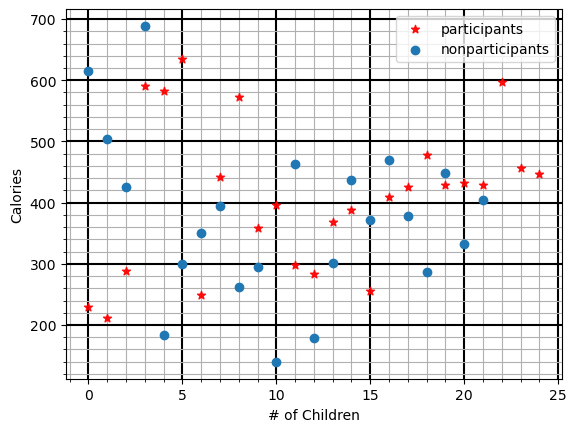

In [119]:
result = pd.concat([parti, nonparti], axis=1)
result.columns = ['participants_calories', 'nonparticipants_calories']
print(result.describe())

plt.rc('axes', axisbelow=True)
plt.minorticks_on()
plt.scatter([x for x in range(parti.size)],parti, c="red", alpha=0.9, marker='*', label="participants")
plt.scatter([x for x in range(nonparti.size)],nonparti, label="nonparticipants")
plt.legend(loc="upper right")
plt.grid(which='both', axis = 'both')
plt.grid(which='major', linewidth ='1.5', c='black')
plt.grid(True)
plt.xlabel("# of Children")
plt.ylabel("Calories")
plt.show()
#help(plt.grid)

#plt.minorticks_on()
#plt.scatter([x for x in range(nonparti.size)],nonparti)
#plt.grid(which='both', axis = 'both')
#plt.grid(which='major', linewidth ='1.5', c='black')
#plt.grid(True)
#plt.xlabel("NonParticipants")
#plt.ylabel("Calories")
#plt.show()

<!-- END QUESTION -->

# Q2

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module.


1. Set up hypotheses and select the alpha level
H0 ∶ μ = 425 (the mean difference is 425, the meal preparation mean calorie consumption is 425)
H1 ∶ μ ≠ 425 (the difference is not 425, the meal preparation mean calorie consumption is not 425)
α = 0.05

2. Select the appropriate test statistic
Since n is small and the sd of the population in unknown, we will use the two-sided test statistic.

3. State the decision rule
The critical value from the standard t-distribution associated with a two-sided test probability of q=1-α/2 and df=parti.size-1 (q=1-0.05/2, df=24)
is 2.0638985616280205.
Decision Rule: Reject H0 if |t| ≥ 2.0638985616280205 , Otherwise, do not reject H0

4. Compute the test statistic and the associated p-value
Used scipy.stats library to calculate the test statistic t-value of -0.6139385690489593 and p-value of 0.5450319510318798

5. Conclusion
Accept H0 since 0.6139385690489593 is less than 1.74. We have significant evidence at the α = 0.05 level that the mean difference is 425. P-value associated with the t-statistic of 0.6139385690489593 between 2 × 0.25 and 2 × 0.275 (since it is a two-sided test). The p-value is between 0.5 and 0.55.P value is equal to 0.5450319510318798 (which indeed is between 0.5 and 0.55). 

In [120]:
# What is the critical value?
#df = N - 1 = 24
q2_cr = stats.t.ppf(q=1-0.05/2, df=parti.size - 1)
q2_cr 

2.0638985616280205

In [121]:
# What is the test statistic and its associated p-value?
p_array = parti['participants'].to_numpy()
q2_t, q2_p = stats.ttest_1samp(p_array, 425)

print('t-value:', q2_t)
print('p-value:', q2_p)

t-value: -0.6139385690489593
p-value: 0.5450319510318798


<!-- END QUESTION -->

# Q3
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval.

The data from 25 children were measured. The sample mean and standard
deviation of the calorie intake were 410.07959999999997 and 24.30275723369676. The calculated 90% confidence interval for the mean calorie intake for participants were 368.50044815647897 and 451.658751843521 calories with a t critical value of 1.711 as shown in the Table B. t-Distribution Critical Values. We are 90% confident that the true mean mean calorie intake for participants is between 368.50044815647897 and 451.658751843521.

<!-- BEGIN QUESTION -->



In [122]:
#print(np.mean(p_array))
#print(stats.sem(p_array))
ci_lower,ci_upper = stats.t.interval(confidence=0.90, df=len(p_array)-1, loc=np.mean(p_array), scale=stats.sem(p_array))

print("confidence interval: ( ", ci_lower, ci_upper, ")")

confidence interval: (  368.50044815647897 451.658751843521 )


<!-- END QUESTION -->

# Q4
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests.

1. Set up the hypotheses and select the alpha level
H0 ∶ μ1 = μ2 (the mean calories consumed are the same)
H1 ∶ μ1 > μ2 (the mean calories consumed by participants is greater than non-participants)
α = 0.05

2. Select the appropriate test statistic
Use t-test as n is small and population sd is unknown. So we will use two sided statistics test with df=min(n1,n2)-1

3. State the decision rule
Decision Rule: Reject H0 if p − value ≤ α
Otherwise, do not reject H0

4. Compute the test t statistic and the associated p-value
Used scipy.stats library to calculate the test statistic t-value of 0.9693504409241457 and p-value of 0.1687759109713235.

5. Conclusion
Fail to reject H0 since p-value is greater than α
We do not have significant evidence at the α = 0.05 level to
conclude that calories consumed by participants is greater than non-participants.

In [123]:
# Compute the critical value
nonp_array = nonparti['nonparticipants'].to_numpy()
q4_cr = stats.t.ppf(q=1-0.05/2, df=min(parti.size, nonparti.size)-1)
q4_cr

2.079613844727662

In [125]:
# Compute the test statistic and its p-value
q4_statistic,q4_p = stats.ttest_ind(p_array, nonp_array, alternative="greater")

print("statistic:", q4_statistic)
print("p-value:", q4_p)

statistic: 0.9693504409241457
p-value: 0.1687759109713235


<!-- END QUESTION -->

